# **PART 1 - Basic Data Understanding (Pandas)**

Load the CSV file into a Pandas DataFrame.

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('separated_names.csv')
df=pd.DataFrame(data)
numd=np.array(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    object
 1   ID          100 non-null    int64 
 2   First_Name  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


Display the first 10 rows.

In [3]:
df.head(10)

,id,ID,First_Name
0,12345Johnny,12345,Johnny
1,93829Sally,93829,Sally
2,20391Larry,20391,Larry
3,29324Valerie,29324,Valerie
4,43557Nina,43557,Nina
5,55027Bob,55027,Bob
6,78551Julia,78551,Julia
7,77268Nina,77268,Nina
8,19876Xander,19876,Xander
9,28290Fiona,28290,Fiona


Show shape, column names, and data types.

In [4]:
df.shape

(100, 3)

In [5]:
df.columns

Index(['id', 'ID', 'First_Name'], dtype='object')

In [6]:
numd.dtype

dtype('O')

Check for missing values and duplicates.

In [7]:
print(df.isnull().sum())#missing values


id            0
ID            0
First_Name    0
dtype: int64


In [8]:
print(df[df.duplicated()])#checking duplicate rows

Empty DataFrame
Columns: [id, ID, First_Name]
Index: []


Use .describe() to get summary statistics for ID (numeric) and First_Name (categorical).

In [9]:
df[['ID','First_Name']].describe(include='all')

,ID,First_Name
count,100.000000,100
unique,NaN,28
top,NaN,Sophia
freq,NaN,8
mean,50694.190000,NaN
std,26500.870402,NaN
min,11314.000000,NaN
25%,26643.500000,NaN
50%,44728.000000,NaN
75%,74815.000000,NaN


# **PART 2 - Data Cleaning**

Split id into two new columns: ID (first 5 chars) and First_Name (remaining chars).


In [10]:
df['ID'] = df['id'].str[:5]
df['First_Name'] = df['id'].str[5:]

Ensure ID is stored as an integer and First_Name as a string.


In [11]:
df['ID']=df['ID'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    object
 1   ID          100 non-null    int64 
 2   First_Name  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


Remove any extra spaces in names.


In [12]:
df['First_Name']=df['First_Name'].str.replace(' ','')



Standardize first names to title case.


In [13]:
df['First_Name'] = df['First_Name'].str.title()
df['First_Name']

0      Johnny
1       Sally
2       Larry
3     Valerie
4        Nina
       ...   
95        Ian
96      Alice
97      Laura
98        Uma
99    Charlie
Name: First_Name, Length: 100, dtype: object



Verify uniqueness of ID.

In [14]:
df['ID'].unique()

array([12345, 93829, 20391, 29324, 43557, 55027, 78551, 77268, 19876,
       28290, 38891, 11314, 90356, 79572, 25714, 31814, 34134, 47654,
       31444, 27526, 15289, 87317, 87475, 18330, 18997, 20241, 82672,
       14287, 92041, 70721, 17534, 95807, 92910, 36356, 15126, 58082,
       72449, 61780, 45533, 42135, 81543, 26645, 53289, 73652, 66364,
       90098, 46820, 90373, 62364, 74911, 24430, 39956, 13595, 66314,
       36524, 81662, 46408, 22471, 81780, 82129, 22185, 63310, 60429,
       60587, 32824, 26639, 65258, 36836, 42970, 32561, 25194, 65262,
       88577, 89466, 17560, 41388, 27462, 17323, 25017, 39287, 40150,
       22342, 71095, 58223, 92725, 16073, 36862, 87883, 74783, 85445,
       43923, 89694, 49910, 42831, 68514, 58388, 43026, 12962, 94063,
       17105])

# **PART 3 - Exploratory Data Analysis (EDA)**

Find the most common first name.



In [15]:
name=df['First_Name'].value_counts()
#print(name)
print("Most common name:\n",name.head(1))

Most common name:
 First_Name
Sophia    8
Name: count, dtype: int64




Count how many unique first names there are.


In [16]:
df['First_Name'].nunique() #  unique first names there are.

28



Find the top 5 IDs (numerically largest).


In [17]:
a=df.sort_values(by='ID',ascending=False)
a.head(6)

,id,ID,First_Name
31,95807Xander,95807,Xander
98,94063Uma,94063,Uma
1,93829Sally,93829,Sally
32,92910Sophia,92910,Sophia
84,92725Nina,92725,Nina
28,92041Sophia,92041,Sophia




Find the bottom 5 IDs (numerically smallest).

In [18]:
a=df.sort_values(by='ID',ascending=False)
a.tail(6)

,id,ID,First_Name
34,15126Ian,15126,Ian
27,14287Kevin,14287,Kevin
52,13595Uma,13595,Uma
97,12962Laura,12962,Laura
0,12345Johnny,12345,Johnny
11,11314Sophia,11314,Sophia




Plot a bar chart of the top 10 most frequent first names.

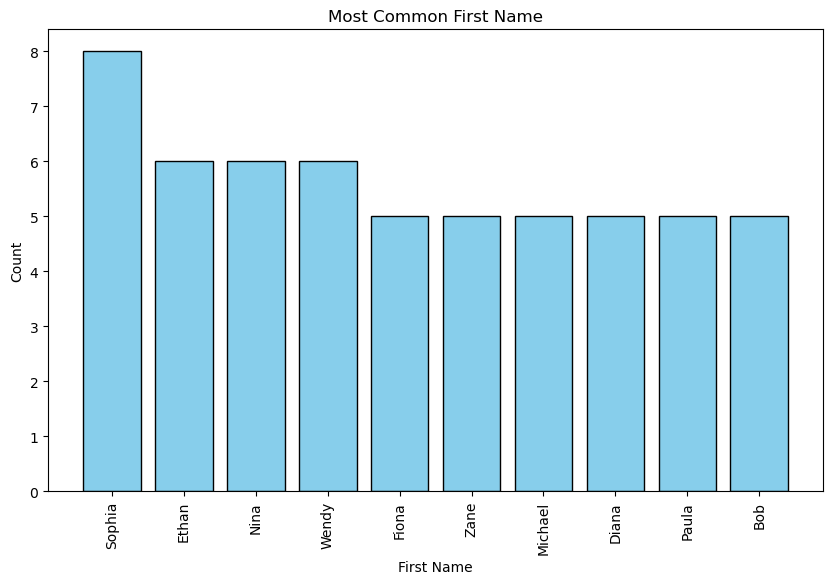

In [19]:
import matplotlib.pyplot as plt
name_counts = df['First_Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(name_counts.index, name_counts.values, color='skyblue',edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Most Common First Name')
plt.xticks(rotation=90)
plt.show()

# **PART 4 - Statistics**

Calculate mean, median, variance, and standard deviation of ID.


In [20]:
print("Mean :",df['ID'].mean())
print("Median :",df['ID'].median())
print("Variance :",round(df['ID'].var(),2))
print("Standard deviation :",round(df['ID'].std(),2))


Mean : 50694.19
Median : 44728.0
Variance : 702296132.07
Standard deviation : 26500.87




Find the probability that ID > 50000.


In [21]:
a=df[df['ID']>50000]
b=df.shape[0]
print("Probability:",len(a)/b)

Probability: 0.45




Find the probability that a name starts with the letter 'A'.

In [22]:
a=df['First_Name'].str.startswith('A').sum()
b=df.shape[0]
print("Probability:",a/b)

Probability: 0.04





Find the percentage of names that have more than 5 letters.


In [23]:
a=(df['First_Name'].str.len()>5).sum()
b=df.shape[0]
per=a*100/b
print("Percentage:",per)

Percentage: 33.0


# **PART 5 - Linear Algebra & NumPy**

Convert the ID column into a NumPy array.






In [24]:
id_arr=np.array(df['ID'])
id_arr

array([12345, 93829, 20391, 29324, 43557, 55027, 78551, 77268, 19876,
       28290, 38891, 11314, 90356, 79572, 25714, 31814, 34134, 47654,
       31444, 27526, 15289, 87317, 87475, 18330, 18997, 20241, 82672,
       14287, 92041, 70721, 17534, 95807, 92910, 36356, 15126, 58082,
       72449, 61780, 45533, 42135, 81543, 26645, 53289, 73652, 66364,
       90098, 46820, 90373, 62364, 74911, 24430, 39956, 13595, 66314,
       36524, 81662, 46408, 22471, 81780, 82129, 22185, 63310, 60429,
       60587, 32824, 26639, 65258, 36836, 42970, 32561, 25194, 65262,
       88577, 89466, 17560, 41388, 27462, 17323, 25017, 39287, 40150,
       22342, 71095, 58223, 92725, 16073, 36862, 87883, 74783, 85445,
       43923, 89694, 49910, 42831, 68514, 58388, 43026, 12962, 94063,
       17105])

Create a random NumPy array of the same size for a “score” column.


In [25]:
b=df.shape[0]
score=np.random.randint(0,101,b)
df['score']=score
df

,id,ID,First_Name,score
0,12345Johnny,12345,Johnny,29
1,93829Sally,93829,Sally,93
2,20391Larry,20391,Larry,95
3,29324Valerie,29324,Valerie,96
4,43557Nina,43557,Nina,49
...,...,...,...,...
95,58388Ian,58388,Ian,14
96,43026Alice,43026,Alice,59
97,12962Laura,12962,Laura,49
98,94063Uma,94063,Uma,6




Perform vector addition and subtraction of ID and “score”.


In [26]:
from re import sub
add=np.add(id_arr,score)
sub=np.subtract(id_arr,score)
print("Addition:",add)
print("Subtraction:",sub)

Addition: [12374 93922 20486 29420 43606 55092 78612 77331 19926 28310 38966 11327
 90392 79595 25745 31835 34228 47753 31516 27526 15385 87350 87557 18416
 19095 20274 82675 14299 92067 70749 17546 95882 92959 36423 15157 58155
 72455 61792 45577 42183 81580 26727 53295 73684 66393 90112 46853 90373
 62422 74911 24458 40053 13631 66407 36528 81726 46457 22534 81838 82205
 22282 63311 60476 60614 32897 26728 65350 36880 43023 32574 25291 65281
 88652 89516 17609 41477 27523 17326 25042 39356 40214 22407 71161 58307
 92766 16146 36954 87883 74856 85518 43940 89759 49987 42869 68614 58402
 43085 13011 94069 17189]
Subtraction: [12316 93736 20296 29228 43508 54962 78490 77205 19826 28270 38816 11301
 90320 79549 25683 31793 34040 47555 31372 27526 15193 87284 87393 18244
 18899 20208 82669 14275 92015 70693 17522 95732 92861 36289 15095 58009
 72443 61768 45489 42087 81506 26563 53283 73620 66335 90084 46787 90373
 62306 74911 24402 39859 13559 66221 36520 81598 46359 22408 81722 82053
 2



Compute the dot product of ID and “score”.




In [27]:
print("Dot product:",np.dot(id_arr,score))

Dot product: 247525538



Perform matrix multiplication between:

Features = [ID, score]
Weights = [0.3, 0.7]

In [28]:
features = df[['ID', 'score']].values
weights = np.array([0.3, 0.7])
result =np.multiply(features,weights)
print(result)

[[3.70350e+03 2.03000e+01]
 [2.81487e+04 6.51000e+01]
 [6.11730e+03 6.65000e+01]
 [8.79720e+03 6.72000e+01]
 [1.30671e+04 3.43000e+01]
 [1.65081e+04 4.55000e+01]
 [2.35653e+04 4.27000e+01]
 [2.31804e+04 4.41000e+01]
 [5.96280e+03 3.50000e+01]
 [8.48700e+03 1.40000e+01]
 [1.16673e+04 5.25000e+01]
 [3.39420e+03 9.10000e+00]
 [2.71068e+04 2.52000e+01]
 [2.38716e+04 1.61000e+01]
 [7.71420e+03 2.17000e+01]
 [9.54420e+03 1.47000e+01]
 [1.02402e+04 6.58000e+01]
 [1.42962e+04 6.93000e+01]
 [9.43320e+03 5.04000e+01]
 [8.25780e+03 0.00000e+00]
 [4.58670e+03 6.72000e+01]
 [2.61951e+04 2.31000e+01]
 [2.62425e+04 5.74000e+01]
 [5.49900e+03 6.02000e+01]
 [5.69910e+03 6.86000e+01]
 [6.07230e+03 2.31000e+01]
 [2.48016e+04 2.10000e+00]
 [4.28610e+03 8.40000e+00]
 [2.76123e+04 1.82000e+01]
 [2.12163e+04 1.96000e+01]
 [5.26020e+03 8.40000e+00]
 [2.87421e+04 5.25000e+01]
 [2.78730e+04 3.43000e+01]
 [1.09068e+04 4.69000e+01]
 [4.53780e+03 2.17000e+01]
 [1.74246e+04 5.11000e+01]
 [2.17347e+04 4.20000e+00]
 

# **PART 6 - Feature Engineering**

Create a new column Name_Length for the number of characters in First_Name.



In [29]:
df['len_name']=df['First_Name'].str.len()
df

,id,ID,First_Name,score,len_name
0,12345Johnny,12345,Johnny,29,6
1,93829Sally,93829,Sally,93,5
2,20391Larry,20391,Larry,95,5
3,29324Valerie,29324,Valerie,96,7
4,43557Nina,43557,Nina,49,4
...,...,...,...,...,...
95,58388Ian,58388,Ian,14,3
96,43026Alice,43026,Alice,59,5
97,12962Laura,12962,Laura,49,5
98,94063Uma,94063,Uma,6,3




Create a binary column Starts_With_Vowel (1 if name starts with A/E/I/O/U, else 0).


In [30]:
vow_name=df['First_Name'].str.startswith(('A','E','I','O','U'))
vow_name=vow_name.astype('int64')
df['vowel_name']=vow_name
df

,id,ID,First_Name,score,len_name,vowel_name
0,12345Johnny,12345,Johnny,29,6,0
1,93829Sally,93829,Sally,93,5,0
2,20391Larry,20391,Larry,95,5,0
3,29324Valerie,29324,Valerie,96,7,0
4,43557Nina,43557,Nina,49,4,0
...,...,...,...,...,...,...
95,58388Ian,58388,Ian,14,3,1
96,43026Alice,43026,Alice,59,5,1
97,12962Laura,12962,Laura,49,5,0
98,94063Uma,94063,Uma,6,3,1




Create a High_ID column (1 if ID > 50000, else 0).



In [31]:
high_id=df['ID']>50000
df['high_id']=high_id.astype('int64')
df

,id,ID,First_Name,score,len_name,vowel_name,high_id
0,12345Johnny,12345,Johnny,29,6,0,0
1,93829Sally,93829,Sally,93,5,0,1
2,20391Larry,20391,Larry,95,5,0,0
3,29324Valerie,29324,Valerie,96,7,0,0
4,43557Nina,43557,Nina,49,4,0,0
...,...,...,...,...,...,...,...
95,58388Ian,58388,Ian,14,3,1,1
96,43026Alice,43026,Alice,59,5,1,0
97,12962Laura,12962,Laura,49,5,0,0
98,94063Uma,94063,Uma,6,3,1,1



Rank names by length using qcut() into 4 quartiles.

In [32]:
name_len = df['First_Name'].str.len()
df['Length_Quartile'] = pd.qcut(name_len, 4, duplicates='drop')
print(df[['First_Name', 'Length_Quartile']].head())

  First_Name Length_Quartile
0     Johnny      (5.0, 6.0]
1      Sally    (2.999, 5.0]
2      Larry    (2.999, 5.0]
3    Valerie      (6.0, 7.0]
4       Nina    (2.999, 5.0]


# **PART 7 -  SQL Simulation in Pandas**

Select all rows where Starts_With_Vowel = 1 and High_ID = 1.


In [33]:
df[(df['vowel_name']==1)&(df['high_id']==1)]

,id,ID,First_Name,score,len_name,vowel_name,high_id,Length_Quartile
35,58082Uma,58082,Uma,73,3,1,1,"(2.999, 5.0]"
37,61780Ethan,61780,Ethan,12,5,1,1,"(2.999, 5.0]"
72,88577Ethan,88577,Ethan,75,5,1,1,"(2.999, 5.0]"
73,89466Ethan,89466,Ethan,50,5,1,1,"(2.999, 5.0]"
95,58388Ian,58388,Ian,14,3,1,1,"(2.999, 5.0]"
98,94063Uma,94063,Uma,6,3,1,1,"(2.999, 5.0]"




Get the top 10 IDs in descending order.


In [34]:
df.sort_values(by='ID', ascending=False).head(10)

,id,ID,First_Name,score,len_name,vowel_name,high_id,Length_Quartile
31,95807Xander,95807,Xander,75,6,0,1,"(5.0, 6.0]"
98,94063Uma,94063,Uma,6,3,1,1,"(2.999, 5.0]"
1,93829Sally,93829,Sally,93,5,0,1,"(2.999, 5.0]"
32,92910Sophia,92910,Sophia,49,6,0,1,"(5.0, 6.0]"
84,92725Nina,92725,Nina,41,4,0,1,"(2.999, 5.0]"
28,92041Sophia,92041,Sophia,26,6,0,1,"(5.0, 6.0]"
47,90373Michael,90373,Michael,0,7,0,1,"(6.0, 7.0]"
12,90356Paula,90356,Paula,36,5,0,1,"(2.999, 5.0]"
45,90098Hannah,90098,Hannah,14,6,0,1,"(5.0, 6.0]"
91,89694Fiona,89694,Fiona,65,5,0,1,"(2.999, 5.0]"




Group by Starts_With_Vowel and count how many rows each has.


In [35]:
df.groupby('vowel_name').size().reset_index(name='count')

,vowel_name,count
0,0,83
1,1,17




Sort by Name_Length (descending) and ID (ascending).

In [36]:
df.sort_values(['len_name','ID'],ascending=[False,True])

,id,ID,First_Name,score,len_name,vowel_name,high_id,Length_Quartile
99,17105Charlie,17105,Charlie,84,7,0,0,"(6.0, 7.0]"
77,17323Charlie,17323,Charlie,3,7,0,0,"(6.0, 7.0]"
30,17534Charlie,17534,Charlie,12,7,0,0,"(6.0, 7.0]"
3,29324Valerie,29324,Valerie,96,7,0,0,"(6.0, 7.0]"
18,31444Charlie,31444,Charlie,72,7,0,0,"(6.0, 7.0]"
...,...,...,...,...,...,...,...,...
95,58388Ian,58388,Ian,14,3,1,1,"(2.999, 5.0]"
66,65258Bob,65258,Bob,92,3,0,1,"(2.999, 5.0]"
71,65262Bob,65262,Bob,19,3,0,1,"(2.999, 5.0]"
21,87317Bob,87317,Bob,33,3,0,1,"(2.999, 5.0]"


# **PART 8 - Insights**

Which name appears most frequently?


In [37]:
name=df['First_Name'].value_counts()
name.head(1)


First_Name
Sophia    8
Name: count, dtype: int64



What is the average ID value?

In [38]:
print(df['ID'].mean())

50694.19





Is there any trend between ID size and name length?



In [39]:
print(df['ID'].corr(df['len_name']))

-0.02587516459648293


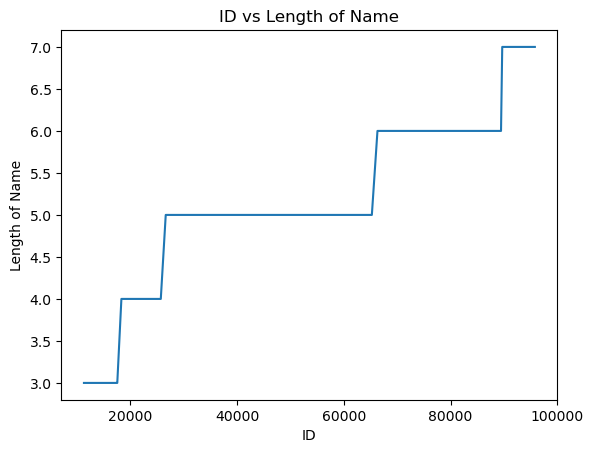

In [40]:
sort_by_id=df.sort_values(by='ID')
sort_by_name=df.sort_values(by='len_name')
plt.plot(sort_by_id['ID'],sort_by_name['len_name'])
plt.xlabel('ID')
plt.ylabel('Length of Name')
plt.title('ID vs Length of Name')
plt.show()


Which quartile of Name_Length has the longest average IDs?

In [41]:
avg_id_by_quartile = df.groupby('Length_Quartile')['ID'].mean()
max_quartile = avg_id_by_quartile.idxmax()
max_avg_id = avg_id_by_quartile.max()
print(f"Quartile with longest average ID: {max_quartile}")
print(f"Average ID in this quartile: {max_avg_id}")


Quartile with longest average ID: (5.0, 6.0]
Average ID in this quartile: 55023.30434782609


C:\Users\boomi\AppData\Local\Temp\ipykernel_25668\1127605253.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_id_by_quartile = df.groupby('Length_Quartile')['ID'].mean()
